<a href="https://colab.research.google.com/github/FProencadeAlbuquerque/PhD_Analysis/blob/main/Param_trifasico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import math as m
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Modelo $\pi$ da linha de transmissão a ser estimado

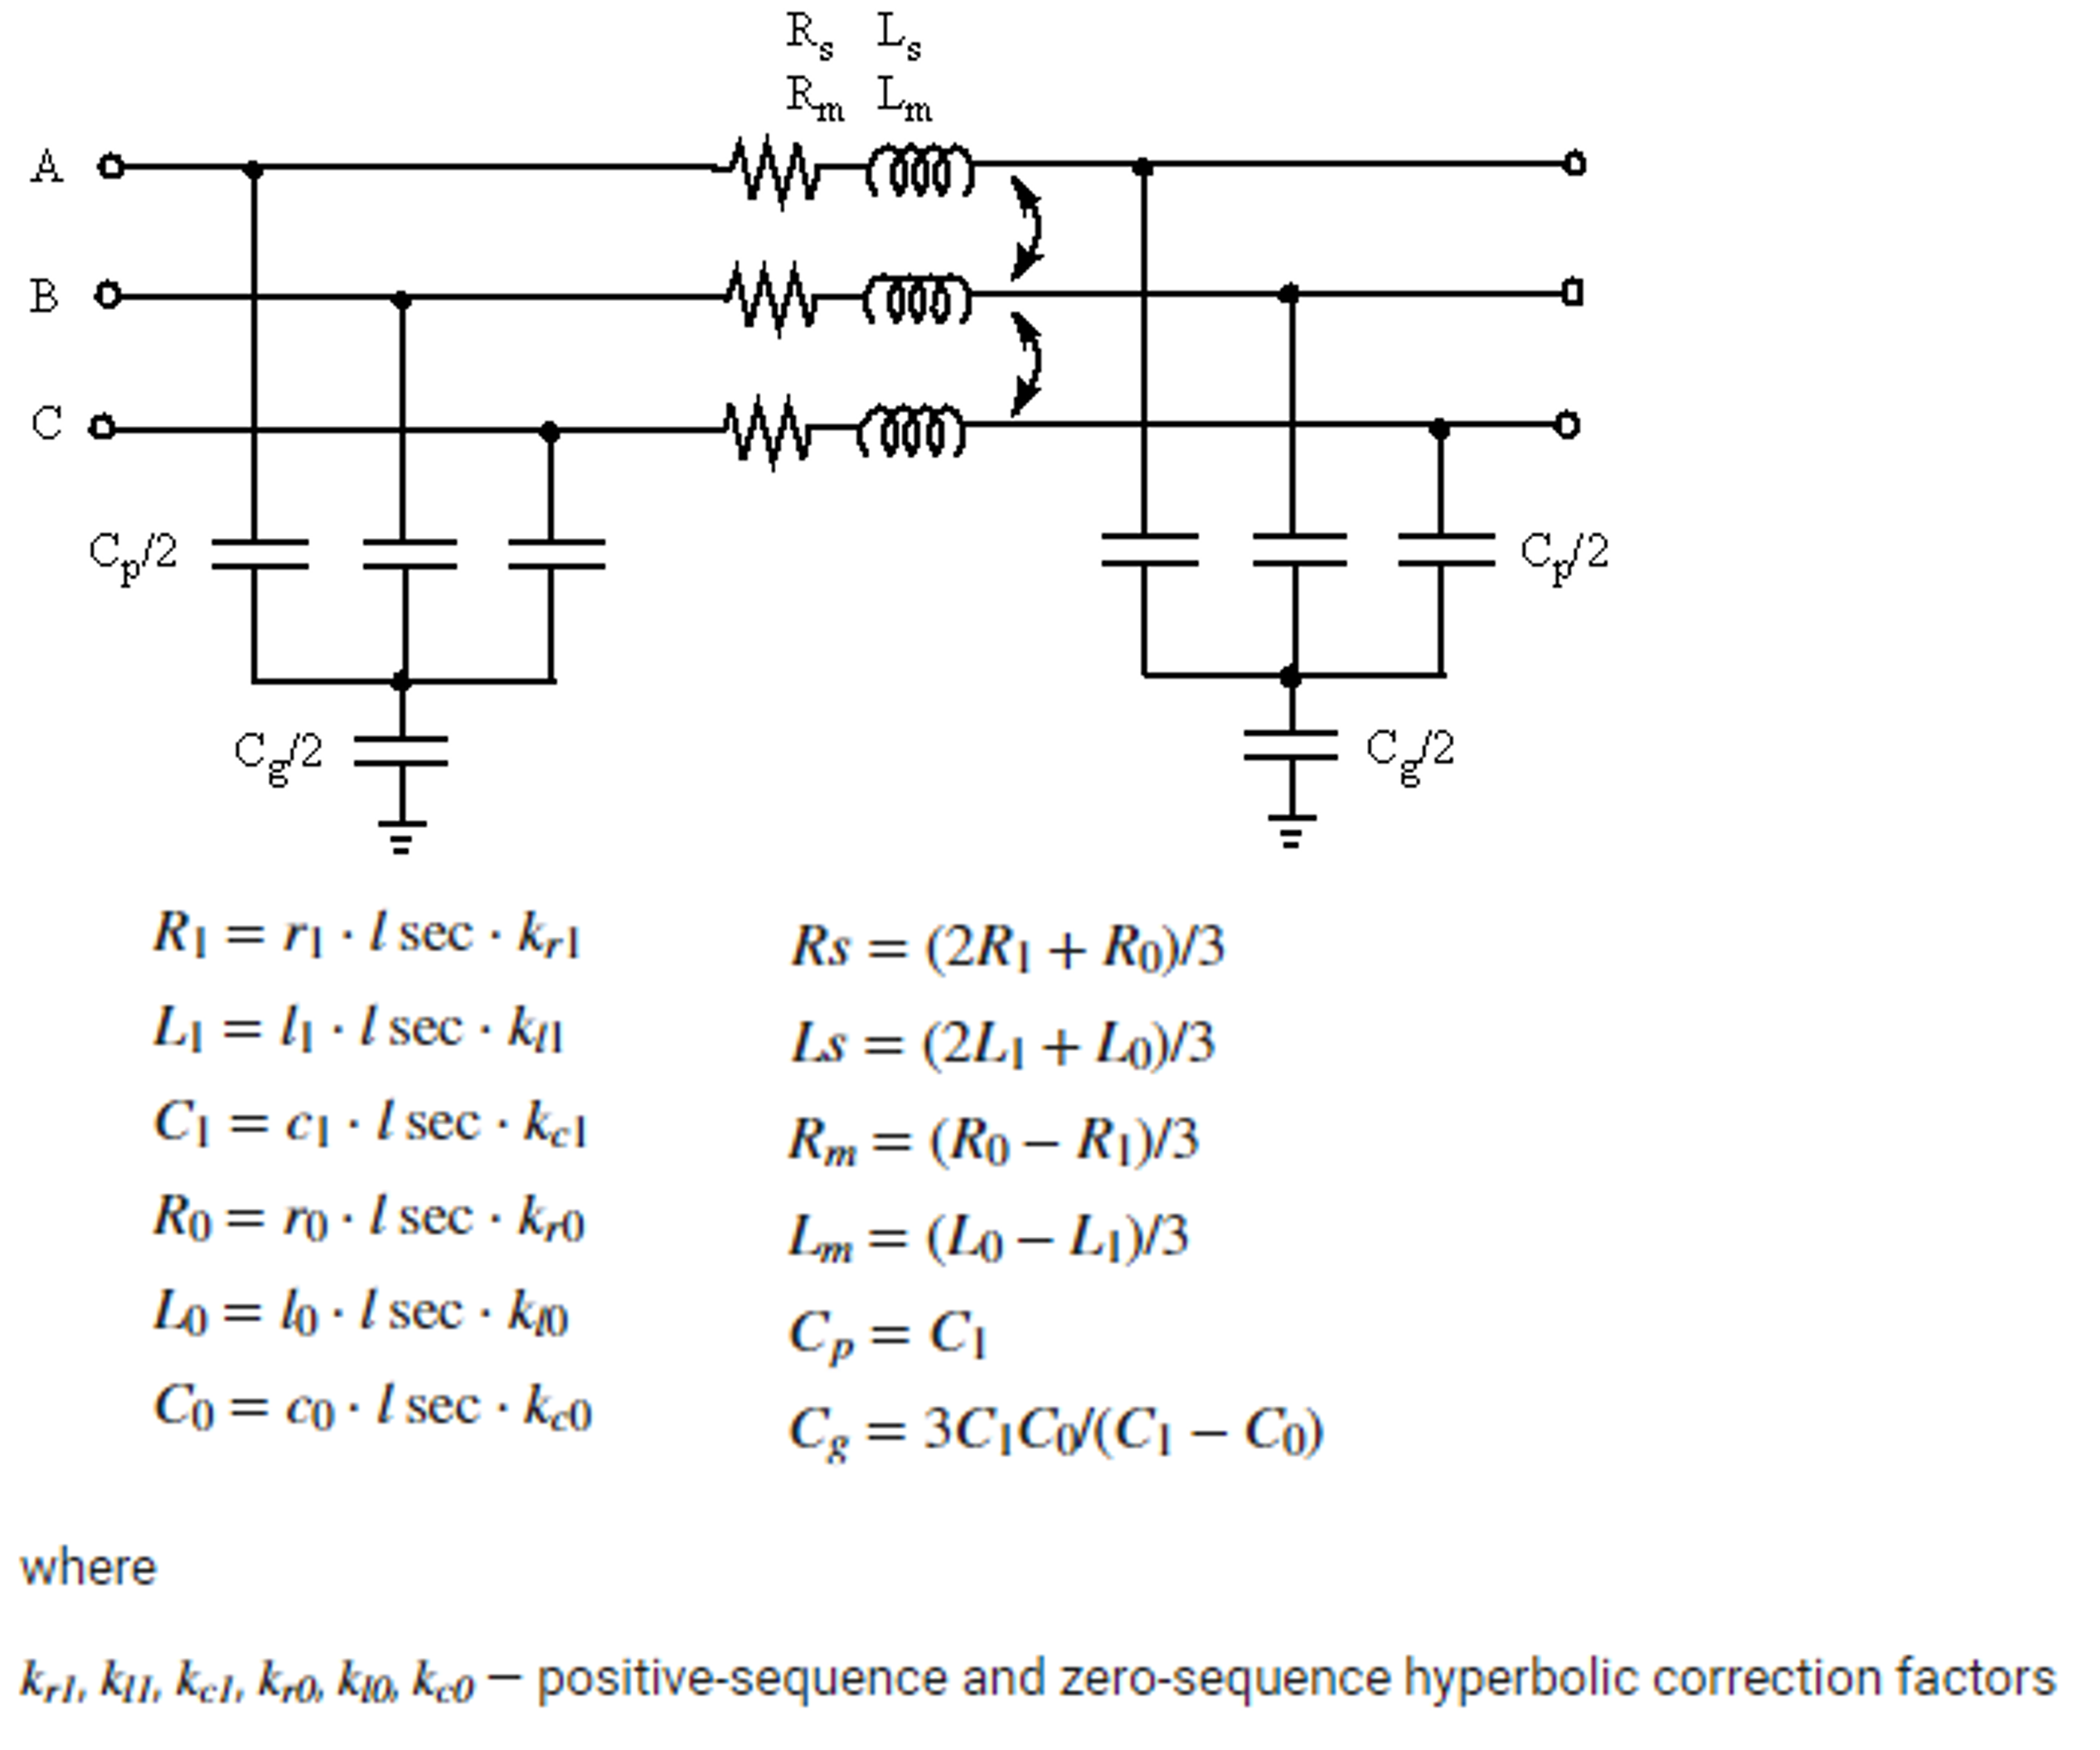



In [3]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    aux=[]
    for i in range(len(y_true)):
      if np.array(y_true)[i] !=0:
        desv=(abs((np.array(y_true)[i]-np.array(y_hat)[i])/np.array(y_true)[i]))
        aux.append(desv)
      else:
        aux.append(0)
    MAPE=abs(100*np.mean(aux))
    print('{} set RMSE:{}, R2:{}, MAPE:{}'.format(label, rmse, variance,MAPE))

In [4]:
def evaluate2(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    aux=[]
    for i in range(len(y_true)):
      if np.array(y_true)[i] !=0:
        desv=(abs((np.array(y_true)[i]-np.array(y_hat)[i])/np.array(y_true)[i]))
        aux.append(desv)
      else:
        aux.append(0)
    MAPE=abs(100*np.mean(aux))
    return MAPE

# **Estimação no caso padrão**

In [5]:
df = pd.read_csv('/content/drive/MyDrive/AlgoritmosDOC/Param_trifasico/Sim_Desequilibrado_Ind_Fp_96.csv', sep = ',')

In [6]:
df.columns=['R+', 'L+','C+','R0','L0','C0','V_in_A','V_in_B','V_in_C','Theta_A','Theta_B','Theta_C','P_in_A','P_in_B','P_in_C','Q_in_A','Q_in_B','Q_in_C','V_out_A','V_out_B','V_out_C','Theta_out_A','Theta_out_B','Theta_out_C','P_out_A','P_out_B','P_out_C','Q_out_A','Q_out_B','Q_out_C']

In [7]:
df['C0']=df['C0']*10**9

df['C+']=df['C+']*10**9

df['L0']=df['L0']*10**3

df['L+']=df['L+']*10**3

df['Rs']=(2*df['R+']+df['R0'])/3

df['Ls']=(2*df['L+']+df['L0'])/3

df['Rm']=(df['R0']-df['R+'])/3

df['Lm']=(df['L0']-df['L+'])/3

df['Cp']=df['C+']

df['Cg']=3*df['C+']*df['C0']/(df['C+']-df['C0'])

In [8]:
df

,R+,L+,C+,R0,L0,C0,V_in_A,V_in_B,V_in_C,Theta_A,...,P_out_C,Q_out_A,Q_out_B,Q_out_C,Rs,Ls,Rm,Lm,Cp,Cg
0,0.20781,1.1563,15.170,0.48497,4.1793,5.4345,1.0076,1.0040,1.0038,-0.008688,...,0.41315,0.100020,0.11207,2.775600e-17,0.300197,2.163967,0.092387,1.007667,15.170,25.404355
1,0.25354,1.1281,11.585,0.57784,4.3740,5.0840,1.0053,1.0019,1.0019,-0.007883,...,0.37256,0.092056,0.10306,8.326700e-17,0.361640,2.210067,0.108100,1.081967,11.585,27.179575
2,0.25562,1.2433,10.811,0.55190,3.3246,4.6958,1.0048,1.0010,1.0015,-0.007382,...,0.37510,0.087700,0.10362,-4.163300e-17,0.354380,1.937067,0.098760,0.693767,10.811,24.904971
3,0.23833,1.2787,13.177,0.53905,3.8283,4.9105,1.0062,1.0026,1.0025,-0.008080,...,0.39281,0.093548,0.10805,6.938900e-18,0.338570,2.128567,0.100240,0.849867,13.177,23.482366
4,0.24765,1.4796,15.511,0.50837,3.2482,4.3523,1.0075,1.0037,1.0036,-0.008388,...,0.41251,0.094475,0.11409,-4.857200e-17,0.334557,2.069133,0.086907,0.589533,15.511,18.149567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.28134,1.2972,15.601,0.50379,3.1654,5.0013,1.0078,1.0038,1.0040,-0.008212,...,0.39640,0.091847,0.10994,1.387800e-17,0.355490,1.919933,0.074150,0.622733,15.601,22.083252
9995,0.27850,1.2684,13.724,0.66390,3.2302,5.3757,1.0065,1.0027,1.0031,-0.007831,...,0.37994,0.089876,0.10785,7.632800e-17,0.406967,1.922333,0.128467,0.653933,13.724,26.511783
9996,0.27207,1.4978,13.175,0.50102,3.1654,5.5156,1.0061,1.0022,1.0022,-0.007816,...,0.38707,0.088838,0.10759,-1.179600e-16,0.348387,2.053667,0.076317,0.555867,13.175,28.462293
9997,0.26509,1.2163,11.034,0.51092,3.6728,4.7017,1.0050,1.0013,1.0015,-0.007536,...,0.37252,0.088374,0.10219,2.775600e-17,0.347033,2.035133,0.081943,0.818833,11.034,24.578064


# Utilizando modelo ***bagging***

In [9]:
from sklearn.multioutput import MultiOutputRegressor

Y1=df[['Rs','Ls','Rm','Lm','Cp','Cg']]

X1=df.drop(columns=['Rs','Ls','Rm','Lm','Cp','Cg'])

scaler=preprocessing.StandardScaler().fit(X1)

X_scaled=scaler.transform(X1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, Y1, test_size=0.3, random_state=42, shuffle=True)

regr = MultiOutputRegressor(ExtraTreesRegressor(max_depth=30,random_state=42)).fit(X_train1, y_train1)

Multi_predicted=regr.predict(X_test1)

target=['Rs','Ls','Rm','Lm','Cp','Cg']

for i in range(len(target)):
  print('O valor do MAPE para ' + str(target[i])+ ' é ' + str(evaluate2(Multi_predicted[i],y_test1.iloc[i])) + ' %')

O valor do MAPE para Rs é 0.10932552321394372 %
O valor do MAPE para Ls é 0.1836803796637595 %
O valor do MAPE para Rm é 0.06236264324428051 %
O valor do MAPE para Lm é 0.05841902562461937 %
O valor do MAPE para Cp é 0.1261743270729668 %
O valor do MAPE para Cg é 0.06689952051672216 %


# **Análise Variando a carga**

In [111]:
from sklearn.multioutput import MultiOutputRegressor

Rs=[]

Ls=[]

Rm=[]

Lm=[]

Cp=[]

Cg=[]


for i in range(19):

  df = pd.read_csv('/content/drive/MyDrive/AlgoritmosDOC/Param_trifasico/Sim1_Des_Var_P.csv', sep = ',')

  df=df.iloc[i*5000:(i+1)*5000]

  df.columns=['R+', 'L+','C+','R0','L0','C0','V_in_A','V_in_B','V_in_C','Theta_A','Theta_B','Theta_C','P_in_A','P_in_B','P_in_C','Q_in_A','Q_in_B','Q_in_C','V_out_A','V_out_B','V_out_C','Theta_out_A','Theta_out_B','Theta_out_C','P_out_A','P_out_B','P_out_C','Q_out_A','Q_out_B','Q_out_C']

  target='Rs'

  df['C0']=df['C0']*10**9

  df['C+']=df['C+']*10**9

  df['L0']=df['L0']*10**3

  df['L+']=df['L+']*10**3

  df['Rs']=(2*df['R+']+df['R0'])/3

  df['Ls']=(2*df['L+']+df['L0'])/3

  df['Rm']=(df['R0']-df['R+'])/3

  df['Lm']=(df['L0']-df['L+'])/3

  df['Cp']=df['C+']

  df['Cg']=3*df['C+']*df['C0']/(df['C+']-df['C0'])

  Y1=df[['Rs','Ls','Rm','Lm','Cp','Cg']]

  X1=df.drop(columns=['Rs','Ls','Rm','Lm','Cp','Cg'])

  scaler=preprocessing.StandardScaler().fit(X1)

  X_scaled=scaler.transform(X1)

  X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, Y1, test_size=0.3, random_state=42, shuffle=True)

  regr = MultiOutputRegressor(ExtraTreesRegressor(max_depth=30,random_state=42)).fit(X_train1, y_train1)

  Multi_predicted=regr.predict(X_test1)

  Rs.append(evaluate2(Multi_predicted[0],y_test1.iloc[0]))

  Ls.append(evaluate2(Multi_predicted[1],y_test1.iloc[1]))

  Rm.append(evaluate2(Multi_predicted[2],y_test1.iloc[2]))

  Lm.append(evaluate2(Multi_predicted[3],y_test1.iloc[3]))

  Cp.append(evaluate2(Multi_predicted[4],y_test1.iloc[4]))

  Cg.append(evaluate2(Multi_predicted[5],y_test1.iloc[5]))


# **Caso seja necessário salvar os valores**

In [19]:
import pandas as pd
 
# initialize data of lists.
data2 = {'Rs':Rs,
         'Ls':Ls,
         'Rm':Rm,
         'Lm':Lm,
         'Cp':Cp,
         'Cg':Cg,
        }
 
# Create DataFrame
df_carga_analise = pd.DataFrame(data2)

df_carga_analise.to_csv ('/content/drive/MyDrive/AlgoritmosDOC/Estimação_Parâmetros/data_carga_analise_2.csv', index = False, header=True)

# Criando o vetor de potências

In [ ]:
df_carga = pd.read_csv('/content/drive/MyDrive/AlgoritmosDOC/Param_trifasico/Sim1_Des_Var_P.csv', sep = ',')

df_carga.columns=['R+', 'L+','C+','R0','L0','C0','V_in_A','V_in_B','V_in_C','Theta_A','Theta_B','Theta_C','P_in_A','P_in_B','P_in_C','Q_in_A','Q_in_B','Q_in_C','V_out_A','V_out_B','V_out_C','Theta_out_A','Theta_out_B','Theta_out_C','P_out_A','P_out_B','P_out_C','Q_out_A','Q_out_B','Q_out_C']

df_carga['Psoma']=df_carga['P_out_A']+df_carga['P_out_B']+df_carga['P_out_C']

Carga_MW=[]

for i in range(19):
  Carga_MW.append(df_carga['Psoma'].iloc[5000*i:5000*(i+1)].mean())

Carga_MW=np.array(Carga_MW)*10

Carga_MW


# Lendo os desvios por carga

In [121]:
df_Par_carga = pd.read_csv('/content/drive/MyDrive/AlgoritmosDOC/Estimação_Parâmetros/data_carga_analise_2.csv', sep = ',')

Rs=df_Par_carga['Rs']

Rm=df_Par_carga['Rm']

Ls=df_Par_carga['Ls']

Lm=df_Par_carga['Lm']

Cp=df_Par_carga['Cp']

Cg=df_Par_carga['Cg']

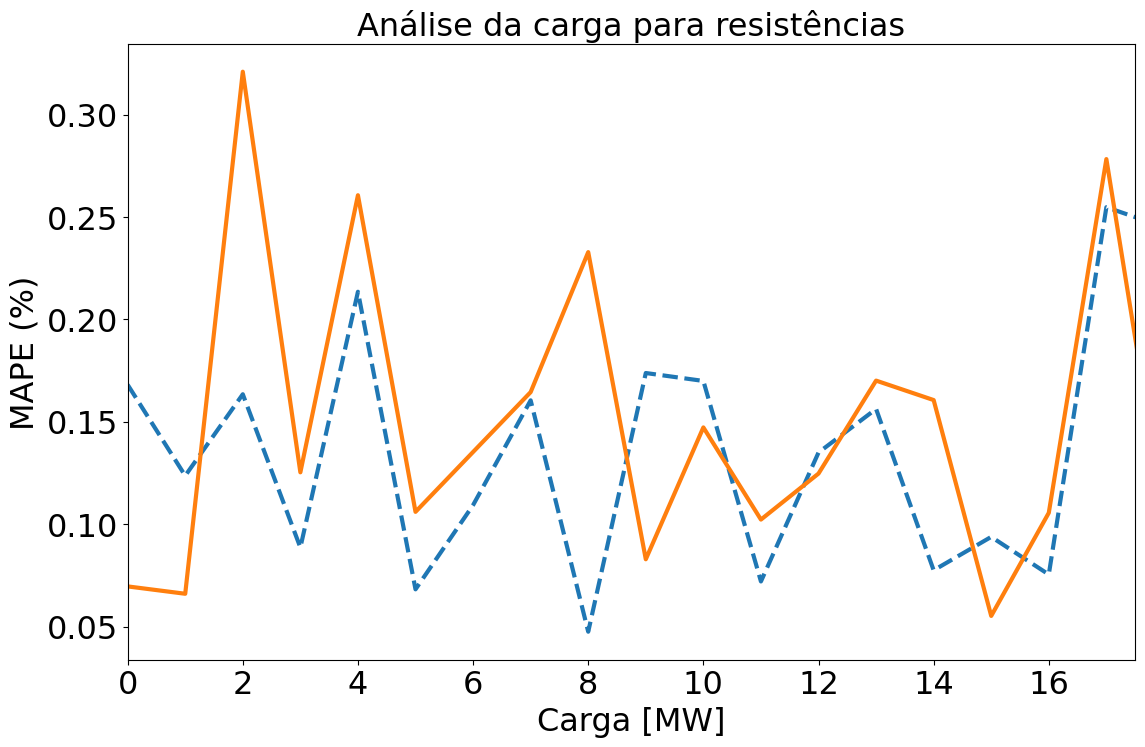

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (13,8))

axis_font = {'fontname':'sans-serif', 'size':'23'}

plt.title('Análise da carga para resistências',**axis_font)

plt.xlabel("Carga [MW]",**axis_font)

plt.ylabel('MAPE (%)',**axis_font)

plt.yticks(fontsize=23)

plt.xticks(fontsize=23)

plt.xlim(0,17.5)

plt.plot(Rs,'--',linewidth=3.0)

plt.plot(Rm,linewidth=3.0)

plt.show()

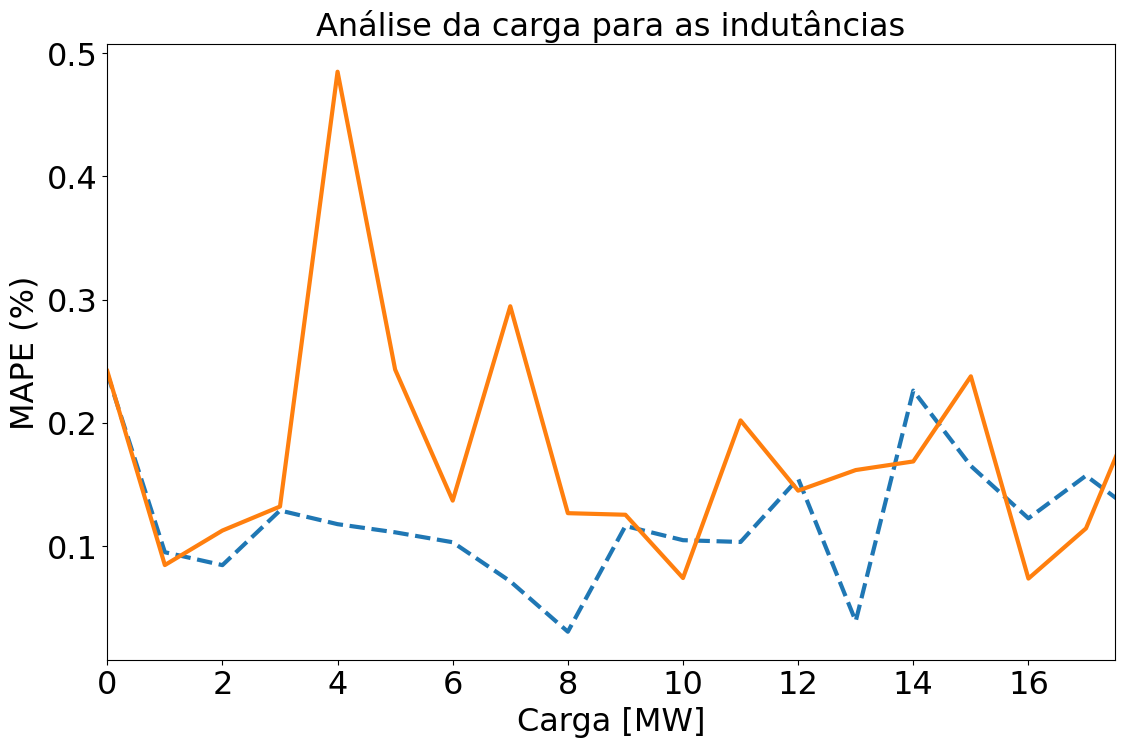

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (13,8))

axis_font = {'fontname':'sans-serif', 'size':'23'}

plt.title('Análise da carga para as indutâncias',**axis_font)

plt.xlabel("Carga [MW]",**axis_font)

plt.ylabel('MAPE (%)',**axis_font)

plt.yticks(fontsize=23)

plt.xticks(fontsize=23)

plt.xlim(0,17.5)

plt.plot(Ls,'--',linewidth=3.0)

plt.plot(Lm,linewidth=3.0)

plt.show()

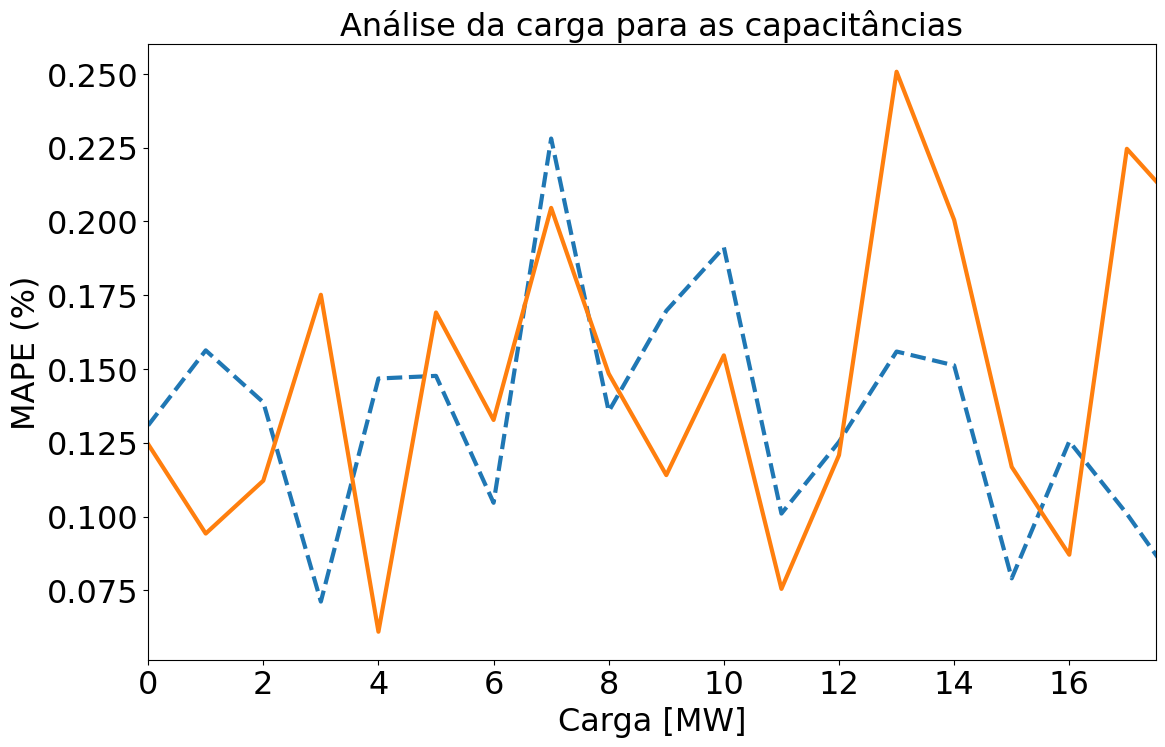

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (13,8))

axis_font = {'fontname':'sans-serif', 'size':'23'}

plt.title('Análise da carga para as capacitâncias',**axis_font)

plt.xlabel("Carga [MW]",**axis_font)

plt.ylabel('MAPE (%)',**axis_font)

plt.yticks(fontsize=23)

plt.xticks(fontsize=23)

plt.xlim(0,17.5)

plt.plot(Cp,'--',linewidth=3.0)

plt.plot(Cg,linewidth=3.0)

plt.show()

# **Análise com apenas um dos lados de medida**

In [10]:
df = pd.read_csv('/content/drive/MyDrive/AlgoritmosDOC/Param_trifasico/Sim_Desequilibrado_Ind_Fp_96.csv', sep = ',')

In [11]:
df.columns=['R+', 'L+','C+','R0','L0','C0','V_in_A','V_in_B','V_in_C','Theta_A','Theta_B','Theta_C','P_in_A','P_in_B','P_in_C','Q_in_A','Q_in_B','Q_in_C','V_out_A','V_out_B','V_out_C','Theta_out_A','Theta_out_B','Theta_out_C','P_out_A','P_out_B','P_out_C','Q_out_A','Q_out_B','Q_out_C']

In [12]:
df['C0']=df['C0']*10**9

df['C+']=df['C+']*10**9

df['L0']=df['L0']*10**3

df['L+']=df['L+']*10**3

df['Rs']=(2*df['R+']+df['R0'])/3

df['Ls']=(2*df['L+']+df['L0'])/3

df['Rm']=(df['R0']-df['R+'])/3

df['Lm']=(df['L0']-df['L+'])/3

df['Cp']=df['C+']

df['Cg']=3*df['C+']*df['C0']/(df['C+']-df['C0'])

In [13]:
df=df.drop(columns=['V_out_A','V_out_B','V_out_C','Theta_out_A','Theta_out_B','Theta_out_C','P_out_A','P_out_B','P_out_C','Q_out_A','Q_out_B','Q_out_C'])

In [14]:
from sklearn.multioutput import MultiOutputRegressor

Y1=df[['Rs','Ls','Rm','Lm','Cp','Cg']]

X1=df.drop(columns=['Rs','Ls','Rm','Lm','Cp','Cg'])

scaler=preprocessing.StandardScaler().fit(X1)

X_scaled=scaler.transform(X1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, Y1, test_size=0.3, random_state=42, shuffle=True)

regr = MultiOutputRegressor(ExtraTreesRegressor(max_depth=30,random_state=42)).fit(X_train1, y_train1)

Multi_predicted=regr.predict(X_test1)

target=['Rs','Ls','Rm','Lm','Cp','Cg']

for i in range(len(target)):
  print('O valor do MAPE para ' + str(target[i])+ ' é ' + str(evaluate2(Multi_predicted[i],y_test1.iloc[i])) + ' %')

O valor do MAPE para Rs é 0.03628161337423545 %
O valor do MAPE para Ls é 0.09932539562930878 %
O valor do MAPE para Rm é 0.04434477968035275 %
O valor do MAPE para Lm é 0.07057617179973782 %
O valor do MAPE para Cp é 0.15202032747200395 %
O valor do MAPE para Cg é 0.04865455618370935 %


# **Análise para o ruído**

In [54]:
df = pd.read_csv('/content/drive/MyDrive/AlgoritmosDOC/Param_trifasico/Sim_Desequilibrado_Ind_Fp_96.csv', sep = ',')

df.columns=['R+', 'L+','C+','R0','L0','C0','V_in_A','V_in_B','V_in_C','Theta_A','Theta_B','Theta_C','P_in_A','P_in_B','P_in_C','Q_in_A','Q_in_B','Q_in_C','V_out_A','V_out_B','V_out_C','Theta_out_A','Theta_out_B','Theta_out_C','P_out_A','P_out_B','P_out_C','Q_out_A','Q_out_B','Q_out_C']

In [55]:
df['C0']=df['C0']*10**9

df['C+']=df['C+']*10**9

df['L0']=df['L0']*10**3

df['L+']=df['L+']*10**3

df['Rs']=(2*df['R+']+df['R0'])/3

df['Ls']=(2*df['L+']+df['L0'])/3

df['Rm']=(df['R0']-df['R+'])/3

df['Lm']=(df['L0']-df['L+'])/3

df['Cp']=df['C+']

df['Cg']=3*df['C+']*df['C0']/(df['C+']-df['C0'])

In [56]:
######## Theta máxima é dado em graus

thetamax =0.5729578

##############################################

########### Sigma é dado em porcentagem ######

sigma=0.01

##############################################

n=len(df['V_in_A'])
np.random.seed(42)
wV2 = df['V_in_A'] +(np.random.uniform(-df['V_in_A'].mean() * (0.01), df['V_in_A'].mean() * (0.01), n))+ (df['V_in_A'].mean() * (sigma / 3)) * np.random.normal(0, 1, n)
np.random.seed(41)
wTheta2 = df['Theta_A']+ (np.random.uniform(-0.34377468, 0.34377468, n)) +(thetamax / 3) * np.random.normal(0, 1, n)
np.random.seed(40)
wV6 = df['V_in_B'] +(np.random.uniform(-df['V_in_B'].mean() * (0.01),df['V_in_B'].mean() * (0.01), n))+( df['V_in_B'].mean() * (sigma / 3)) * np.random.normal(0, 1, n)
np.random.seed(39)
wTheta6 = df['Theta_B']+(np.random.uniform(-0.34377468 , 0.34377468 , n)) + (thetamax / 3) * np.random.normal(0, 1, n)
np.random.seed(38)
wV9 = df['V_in_C']+ (np.random.uniform(-df['V_in_C'].mean() * (0.01), df['V_in_C'].mean() * (0.01), n))+(df['V_in_C'].mean() * (sigma / 3)) * np.random.normal(0, 1, n)
np.random.seed(37)
wTheta9 = df['Theta_C']+ (np.random.uniform(-0.34377468, 0.34377468, n))+(thetamax / 3) * np.random.normal(0, 1, n)

np.random.seed(36)
wV22 = df['V_out_A'] +(np.random.uniform(-df['V_out_A'].mean() * (0.01), df['V_out_A'].mean() * (0.01), n))+ (df['V_out_A'].mean() * (sigma / 3)) * np.random.normal(0, 1, n)
np.random.seed(35)
wTheta22 = df['Theta_out_A']+ (np.random.uniform(-0.34377468, 0.34377468, n)) +(thetamax / 3) * np.random.normal(0, 1, n)
np.random.seed(34)
wV62 = df['V_out_B'] +(np.random.uniform(-df['V_out_B'].mean() * (0.01),df['V_in_B'].mean() * (0.01), n))+( df['V_in_B'].mean() * (sigma / 3)) * np.random.normal(0, 1, n)
np.random.seed(33)
wTheta62 = df['Theta_out_B']+(np.random.uniform(-0.34377468 , 0.34377468 , n)) + (thetamax / 3) * np.random.normal(0, 1, n)
np.random.seed(32)
wV92 = df['V_out_C']+ (np.random.uniform(-df['V_out_C'].mean() * (0.01), df['V_out_C'].mean() * (0.01), n))+(df['V_out_C'].mean() * (sigma / 3)) * np.random.normal(0, 1, n)
np.random.seed(31)
wTheta92 = df['Theta_out_C']+ (np.random.uniform(-0.34377468, 0.34377468, n))+(thetamax / 3) * np.random.normal(0, 1, n)

df['V_in_A']=wV2
df['Theta_A']=wTheta2
df['V_in_B']=wV6
df['Theta_B']=wTheta6
df['V_in_C']=wV9
df['Theta_C']=wTheta9

df['V_out_A']=wV22
df['Theta_out_A']=wTheta22
df['V_out_B']=wV62
df['Theta_out_B']=wTheta62
df['V_out_C']=wV92
df['Theta_out_C']=wTheta92

[]

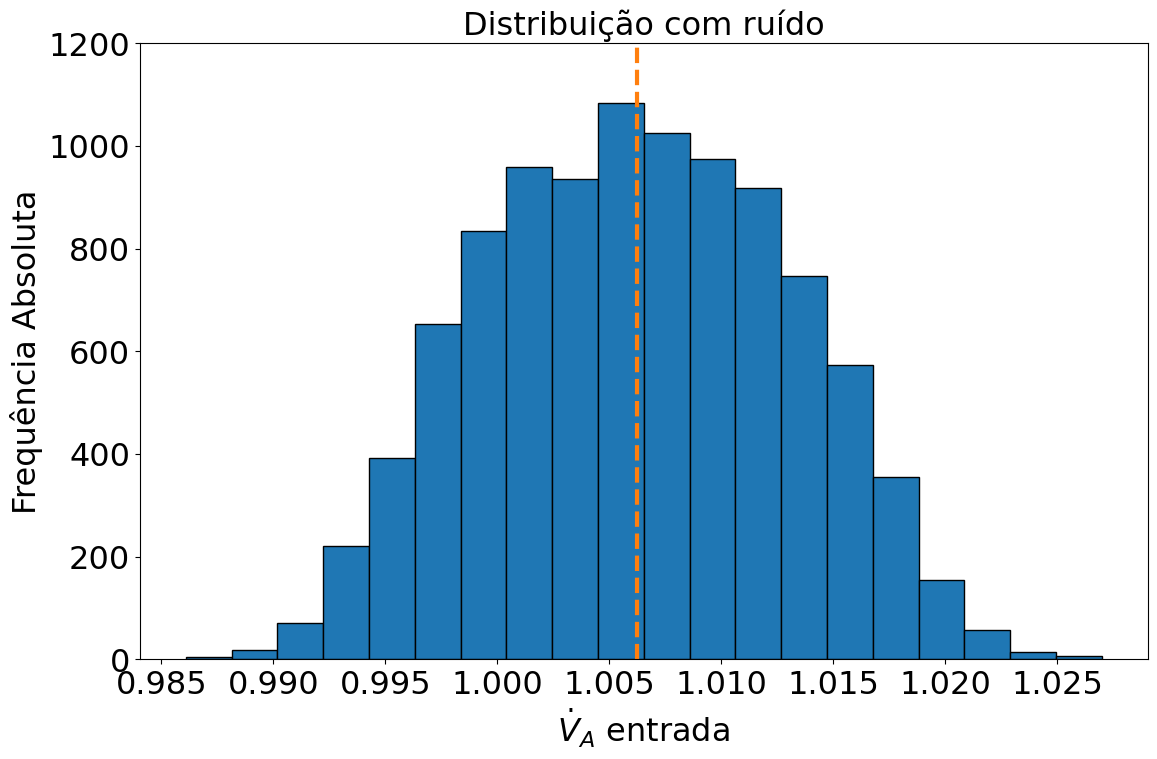

In [63]:
fig, ax = plt.subplots(figsize = (13,8))

axis_font = {'fontname':'sans-serif', 'size':'23'}

plt.title('Distribuição com ruído',**axis_font)

plt.xlabel("$\dot{V}_A$ entrada",**axis_font)

plt.ylabel('Frequência Absoluta',**axis_font)

plt.yticks(fontsize=23)

plt.xticks(fontsize=23)

plt.hist(df['V_in_A'],bins=20,ec='black')

plt.plot([df['V_in_A'].mean() for i in range(len(df['V_in_A']))],[i for i in range(len(df['V_in_A']))],'--',linewidth=3.0)

plt.ylim(0,1200)

plt.plot()

In [59]:
from sklearn.multioutput import MultiOutputRegressor

Y1=df[['Rs','Ls','Rm','Lm','Cp','Cg']]

X1=df.drop(columns=['Rs','Ls','Rm','Lm','Cp','Cg'])

scaler=preprocessing.StandardScaler().fit(X1)

X_scaled=scaler.transform(X1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, Y1, test_size=0.3, random_state=42, shuffle=True)

regr = MultiOutputRegressor(ExtraTreesRegressor(max_depth=30,random_state=42)).fit(X_train1, y_train1)

Multi_predicted=regr.predict(X_test1)

target=['Rs','Ls','Rm','Lm','Cp','Cg']

for i in range(len(target)):
  print('O valor do MAPE para ' + str(target[i])+ ' é ' + str(evaluate2(Multi_predicted[i],y_test1.iloc[i])) + ' %')

O valor do MAPE para Rs é 0.117652442096994 %
O valor do MAPE para Ls é 0.07831595383051229 %
O valor do MAPE para Rm é 0.07199767474204222 %
O valor do MAPE para Lm é 0.0726239359796784 %
O valor do MAPE para Cp é 0.10979898564741737 %
O valor do MAPE para Cg é 0.0937461880912265 %
